In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#df_sleep = pd.read_csv('/home/matias/workspace/health/data-filter/sleep.csv')

In [3]:
# Especificar las columnas que deseas cargar
columnas = ['physical_recovery', 'original_wake_up_time', 'movement_awakening', 'original_bed_time','sleep_cycle','efficiency','sleep_score', 'sleep_duration', 'com.samsung.health.sleep.start_time','com.samsung.health.sleep.update_time','com.samsung.health.sleep.create_time','com.samsung.health.sleep.end_time']

# Cargar solo las columnas especificadas
df_sleep = pd.read_csv('/home/matias/workspace/health/data-filter/sleep.csv', usecols=columnas, parse_dates=['original_wake_up_time','original_bed_time','com.samsung.health.sleep.start_time','com.samsung.health.sleep.update_time','com.samsung.health.sleep.create_time','com.samsung.health.sleep.end_time'])

# Cambiar los nombres de las columnas eliminando el prefijo
df_sleep.rename(columns=lambda x: x.replace('com.samsung.health.sleep.', ''), inplace=True)


In [4]:
# Obtener información general del DataFrame
print("\nInformación general del DataFrame:")
print(df_sleep.info())



Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   physical_recovery      144 non-null    int64         
 1   original_wake_up_time  122 non-null    datetime64[ns]
 2   movement_awakening     144 non-null    int64         
 3   original_bed_time      122 non-null    datetime64[ns]
 4   sleep_cycle            144 non-null    int64         
 5   efficiency             144 non-null    int64         
 6   sleep_score            144 non-null    int64         
 7   sleep_duration         144 non-null    int64         
 8   start_time             144 non-null    datetime64[ns]
 9   update_time            144 non-null    datetime64[ns]
 10  create_time            144 non-null    datetime64[ns]
 11  end_time               144 non-null    datetime64[ns]
dtypes: datetime64[ns](6), int64(

In [5]:
# Estadísticas descriptivas básicas
print("\nEstadísticas descriptivas básicas:")
print(df_sleep.describe())


Estadísticas descriptivas básicas:
       physical_recovery          original_wake_up_time  movement_awakening  \
count         144.000000                            122          144.000000   
mean           61.583333  2024-03-04 13:09:05.901639424           21.652778   
min             9.000000            2023-12-19 12:43:00            2.000000   
25%            55.000000            2024-02-03 17:53:00           15.000000   
50%            63.000000            2024-03-07 13:46:00           20.000000   
75%            71.000000            2024-04-07 04:27:15           27.250000   
max            93.000000            2024-05-07 10:05:00           53.000000   
std            14.478100                            NaN           10.019086   

                   original_bed_time  sleep_cycle  efficiency  sleep_score  \
count                            122   144.000000  144.000000   144.000000   
mean   2024-03-04 06:08:11.311475456     3.631944   88.979167    76.270833   
min              2

In [6]:
print("Primeras filas del DataFrame:")
print(df_sleep.head())


Primeras filas del DataFrame:
   physical_recovery original_wake_up_time  movement_awakening  \
0                 59                   NaT                  17   
1                  9                   NaT                  20   
2                 42                   NaT                  23   
3                 69   2023-12-19 12:43:00                  18   
4                 63   2023-12-20 11:37:00                  38   

    original_bed_time  sleep_cycle  efficiency  sleep_score  sleep_duration  \
0                 NaT            4          88           53             371   
1                 NaT            1          88           38              93   
2                 NaT            3          88           55             315   
3 2023-12-19 03:50:00            5          90           85             514   
4 2023-12-20 03:51:00            4          82           82             443   

           start_time             update_time             create_time  \
0 2023-12-24 07:03:00 202

In [7]:
df_sleep.tail(10)

,physical_recovery,original_wake_up_time,movement_awakening,original_bed_time,sleep_cycle,efficiency,sleep_score,sleep_duration,start_time,update_time,create_time,end_time
134,72,2024-04-28 12:43:00,15,2024-04-28 04:44:00,3,91,88,466,2024-04-28 04:44:00,2024-04-28 12:50:16.611,2024-04-28 12:50:06.394,2024-04-28 12:30:00
135,75,2024-04-29 11:15:00,12,2024-04-29 03:15:00,4,91,90,448,2024-04-29 03:15:00,2024-04-29 11:39:52.023,2024-04-29 11:39:40.293,2024-04-29 10:43:00
136,63,2024-04-30 10:44:00,30,2024-04-30 03:45:00,3,85,80,412,2024-04-30 03:45:00,2024-04-30 10:44:32.066,2024-04-30 10:44:18.369,2024-04-30 10:37:00
137,62,2024-05-01 12:18:00,15,2024-05-01 04:51:00,5,90,84,426,2024-05-01 04:51:00,2024-05-01 12:35:30.011,2024-05-01 12:35:15.182,2024-05-01 11:57:00
138,76,2024-05-02 12:01:00,37,2024-05-02 02:46:00,4,88,82,528,2024-05-02 02:46:00,2024-05-02 12:23:09.229,2024-05-02 12:23:00.160,2024-05-02 11:34:00
139,55,2024-05-03 10:17:00,23,2024-05-03 03:24:00,5,88,75,386,2024-05-03 03:24:00,2024-05-03 10:24:59.968,2024-05-03 10:24:46.286,2024-05-03 09:50:00
140,43,2024-05-04 09:47:00,31,2024-05-04 04:35:00,2,85,57,308,2024-05-04 04:35:00,2024-05-04 09:47:21.728,2024-05-04 09:47:10.679,2024-05-04 09:43:00
141,75,2024-05-05 11:42:00,34,2024-05-05 03:13:00,5,87,80,482,2024-05-05 03:13:00,2024-05-05 12:00:35.166,2024-05-05 12:00:08.187,2024-05-05 11:15:00
142,65,2024-05-06 11:07:00,18,2024-05-06 03:29:00,3,91,82,437,2024-05-06 03:29:00,2024-05-06 11:15:38.706,2024-05-06 11:15:26.330,2024-05-06 10:46:00
143,53,2024-05-07 10:05:00,20,2024-05-07 03:27:00,2,90,74,381,2024-05-07 03:27:00,2024-05-07 10:09:57.415,2024-05-07 10:09:44.218,2024-05-07 09:48:00


In [8]:
columnas_datetime = ['original_wake_up_time', 'original_bed_time', 'start_time', 'update_time', 'create_time', 'end_time']
df_sleep[columnas_datetime] = df_sleep[columnas_datetime] - pd.Timedelta(hours=3)
df_sleep.tail(10)

,physical_recovery,original_wake_up_time,movement_awakening,original_bed_time,sleep_cycle,efficiency,sleep_score,sleep_duration,start_time,update_time,create_time,end_time
134,72,2024-04-28 09:43:00,15,2024-04-28 01:44:00,3,91,88,466,2024-04-28 01:44:00,2024-04-28 09:50:16.611,2024-04-28 09:50:06.394,2024-04-28 09:30:00
135,75,2024-04-29 08:15:00,12,2024-04-29 00:15:00,4,91,90,448,2024-04-29 00:15:00,2024-04-29 08:39:52.023,2024-04-29 08:39:40.293,2024-04-29 07:43:00
136,63,2024-04-30 07:44:00,30,2024-04-30 00:45:00,3,85,80,412,2024-04-30 00:45:00,2024-04-30 07:44:32.066,2024-04-30 07:44:18.369,2024-04-30 07:37:00
137,62,2024-05-01 09:18:00,15,2024-05-01 01:51:00,5,90,84,426,2024-05-01 01:51:00,2024-05-01 09:35:30.011,2024-05-01 09:35:15.182,2024-05-01 08:57:00
138,76,2024-05-02 09:01:00,37,2024-05-01 23:46:00,4,88,82,528,2024-05-01 23:46:00,2024-05-02 09:23:09.229,2024-05-02 09:23:00.160,2024-05-02 08:34:00
139,55,2024-05-03 07:17:00,23,2024-05-03 00:24:00,5,88,75,386,2024-05-03 00:24:00,2024-05-03 07:24:59.968,2024-05-03 07:24:46.286,2024-05-03 06:50:00
140,43,2024-05-04 06:47:00,31,2024-05-04 01:35:00,2,85,57,308,2024-05-04 01:35:00,2024-05-04 06:47:21.728,2024-05-04 06:47:10.679,2024-05-04 06:43:00
141,75,2024-05-05 08:42:00,34,2024-05-05 00:13:00,5,87,80,482,2024-05-05 00:13:00,2024-05-05 09:00:35.166,2024-05-05 09:00:08.187,2024-05-05 08:15:00
142,65,2024-05-06 08:07:00,18,2024-05-06 00:29:00,3,91,82,437,2024-05-06 00:29:00,2024-05-06 08:15:38.706,2024-05-06 08:15:26.330,2024-05-06 07:46:00
143,53,2024-05-07 07:05:00,20,2024-05-07 00:27:00,2,90,74,381,2024-05-07 00:27:00,2024-05-07 07:09:57.415,2024-05-07 07:09:44.218,2024-05-07 06:48:00


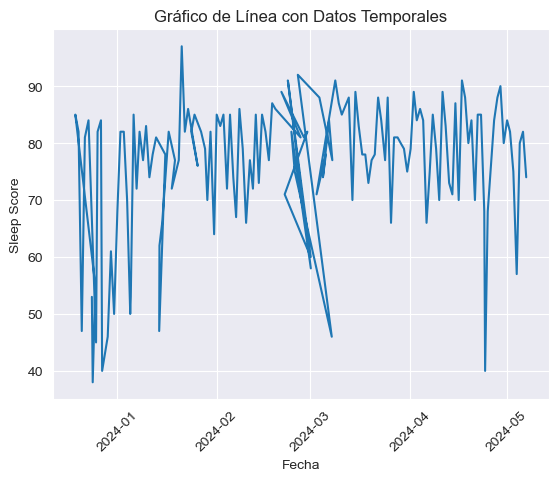

In [9]:
# Graficar el valor en función de la fecha
plt.plot(df_sleep['start_time'], df_sleep['sleep_score'])
plt.xlabel('Fecha')
plt.ylabel('Sleep Score')
plt.title('Gráfico de Línea con Datos Temporales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

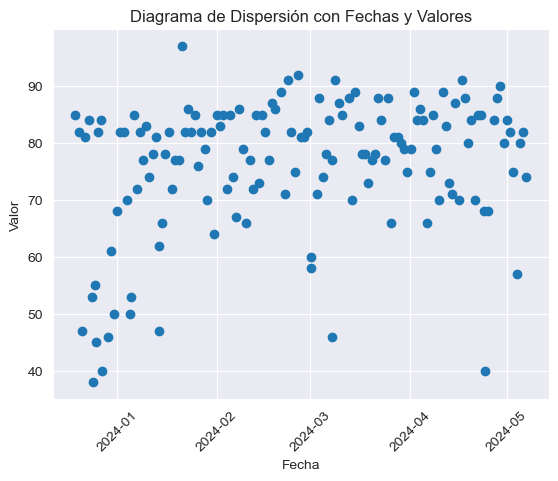

In [10]:
# Graficar el diagrama de dispersión
plt.scatter(df_sleep['start_time'], df_sleep['sleep_score'])
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.title('Diagrama de Dispersión con Fechas y Valores')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Matriz de Correlación:
                    physical_recovery  movement_awakening  sleep_cycle  \
physical_recovery            1.000000           -0.089949     0.575639   
movement_awakening          -0.089949            1.000000    -0.044331   
sleep_cycle                  0.575639           -0.044331     1.000000   
efficiency                   0.116896           -0.886722     0.141264   
sleep_score                  0.782855           -0.213076     0.550241   

                    efficiency  sleep_score  
physical_recovery     0.116896     0.782855  
movement_awakening   -0.886722    -0.213076  
sleep_cycle           0.141264     0.550241  
efficiency            1.000000     0.242647  
sleep_score           0.242647     1.000000  


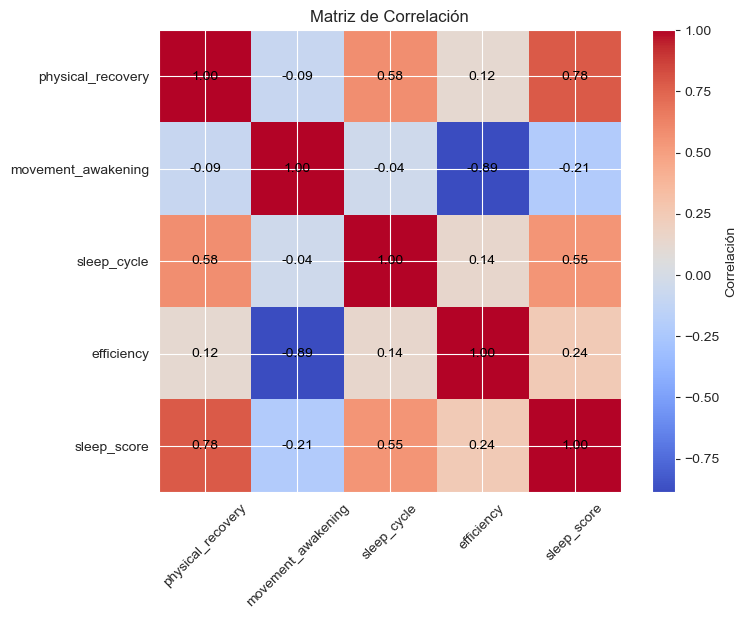

In [12]:
# Seleccionar solo las columnas deseadas para la matriz de correlación
columnas_deseadas = ['physical_recovery', 'movement_awakening', 'sleep_cycle', 'efficiency', 'sleep_score']
df_seleccionado = df_sleep[columnas_deseadas]

correlation_matrix = df_seleccionado.corr()

# Mostrar la matriz de correlación
print("Matriz de Correlación:")
print(correlation_matrix)

# Crear un mapa de calor (heatmap) de la matriz de correlación utilizando matplotlib
plt.figure(figsize=(8, 6))
heatmap = plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar(heatmap, label='Correlación')
plt.title('Matriz de Correlación')
plt.xticks(ticks=range(len(columnas_deseadas)), labels=columnas_deseadas, rotation=45)
plt.yticks(ticks=range(len(columnas_deseadas)), labels=columnas_deseadas)

# Agregar anotaciones a cada cuadrado
for i in range(len(columnas_deseadas)):
    for j in range(len(columnas_deseadas)):
        plt.text(j, i, f"{correlation_matrix.iloc[i, j]:.2f}", ha='center', va='center', color='black')

plt.show()